In [2]:
import pandas as pd
import seaborn as sns

from io import BytesIO
import requests

# Google
import gspread
from df2gspread import df2gspread as d2g # заливает df в docs
from oauth2client.service_account import ServiceAccountCredentials # Авторизация
# VK
import vk_api
import random

**Для начала, давайте посмотрим на распределение посещений сайта по дням. 
Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика.**

In [4]:
df_step_1 = pd.read_csv('step_1_lesson_7.csv')

In [5]:
df_step_1

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


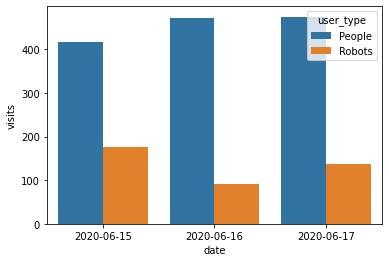

In [7]:
sns.barplot(data=df_step_1, x=df_step_1.date, y=df_step_1.visits, hue=df_step_1.user_type)

**Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Ответ округлите до целого.**

In [26]:
df_step_2 = pd.read_csv('step_2_lesson_7.csv')

In [27]:
df_step_2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [34]:
df_step_2['percent'] = df_step_2.visits.div(df_step_2.visits.sum()).mul(100).round()

In [39]:
df_step_2

,date,browser,visits,percent
0,2020-06-15,Google Chrome,354.0,60.0
1,2020-06-15,Firefox,58.0,10.0
2,2020-06-15,Yandex Browser,54.0,9.0
3,2020-06-15,Safari,41.0,7.0
4,2020-06-15,Chrome Mobile,31.0,5.0
5,2020-06-15,Opera,16.0,3.0
6,2020-06-15,Mobile Safari,16.0,3.0
7,2020-06-15,Samsung Internet,9.0,2.0
8,2020-06-15,Edge,5.0,1.0
9,2020-06-15,UCWEB,4.0,1.0


**Определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?**

In [169]:
df_step_3 = pd.read_csv('step_3_lesson_7.csv')

In [235]:
df_step_3.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [171]:
browser_visits = df_step_3\
    .groupby('browser', as_index=False)\
    .agg({'visits': 'sum'})

In [237]:
browser_visits

,browser,visits
0,Android Browser,1.0
1,Chrome Mobile,31.0
2,Chromium,2.0
3,CocCoc,1.0
4,Edge,5.0
5,Firefox,58.0
6,Google Chrome,354.0
7,Mobile Safari,16.0
8,Opera,16.0
9,Safari,41.0


In [172]:
df_step_3_full = df_step_3.merge(browser_visits, on='browser', suffixes=('_type', '_all')) # заменяю суффиксы x и y

In [238]:
df_step_3_full['share'] = df_step_3_full.visits_type / df_step_3_full.visits_all 
# создаю колонку с долей (поделил визиты роботов и людей с одного браузера на их общее количество визитов с этого браузера)

In [180]:
df_step_3_full.query('user_type == "Robots"').nlargest(1, columns='share') # nlargest(2 args) выдает самый большой результат

,date,browser,user_type,visits_type,visits_all,share
15,2020-06-15,UCWEB,Robots,4.0,4.0,1.0


**Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. 
Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.
В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.**

In [227]:
df_step_4 = pd.read_csv('step_4_lesson_7.csv')

In [329]:
df_step_4.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [239]:
df_step_4['percent_from_all_visits'] = (df_step_4.visits / df_step_4.visits.sum()).mul(100).round(1) 
# взял визиты людей и роботов с одного браузера и поделил их на всю сумму визитов со всех браузеров за этот день

In [233]:
df_step_4.query('browser == "Safari" and user_type == "People"')

,date,browser,user_type,visits,percent_from_all_visits
7,2020-06-15,Safari,People,19.0,3.2


**При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. 
Далее отправьте ссылку на получившийся файл в Google SpreadSheet 
(не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) 
при помощи VK API себе в личку ВКонтакте.**

In [269]:
path_to_credential = 'test-project-352105-.json'

In [245]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

In [247]:
#Authorization
credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credential, scope)
gs = gspread.authorize(credentials)

In [ ]:
my_mail = 'kipia.ralykov@gmail.com'

spreadsheet_name = 'visits_percetage_per_day'
sheet = gs.create(spreadsheet_name) # Создаем пустую таблицу

sheet.share(my_mail, perm_type='user', role='writer') # расшариваем ее

gs.open(spreadsheet_name).get_worksheet(0) # открываем и узнаем название первого листа

In [296]:
# грузим df на лист
d2g.upload(df_step_4, spreadsheet_name, 'Sheet1', credentials=credentials, row_names=True)

<Worksheet 'Sheet1' id:0>

In [297]:
sheet_url = 'https://docs.google.com/spreadsheets/d/%s' % sheet.id # плучаем ссылку на таблицу

In [261]:
# пересылка в VK

In [300]:
token = 'Your_token'

In [301]:
vk_session = vk_api.VkApi(token=token)
vk = vk_session.get_api() # открытие сессии вк (вызов vk api) и передача токена

In [303]:
vk.messages.send(
    chat_id=2, # id чата в которое добавлено сообщество
    random_id=3, # подставляем что бы избежать двух одинаковых отправок(не отправит второй раз)
    message = sheet_url)

0

**Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. 
Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика 
и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.**

**В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome(округлите до целого)**

In [330]:
req = requests.get('https://docs.google.com/spreadsheets/d/e/YOUR_URL_FILE=csv')
data = req.content

df = pd.read_csv(BytesIO(data))

In [308]:
df.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [320]:
df_step_4 = df_step_4.drop(columns='percent_from_all_visits')

In [395]:
df_5 = df_step_4.merge(df, how='inner', on=['date', 'browser', 'user_type'])

In [396]:
df_5.head()

,date,browser,user_type,visits,users
0,2020-06-15,Google Chrome,People,250.0,240.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0
2,2020-06-15,Yandex Browser,People,47.0,44.0
3,2020-06-15,Firefox,Robots,31.0,29.0
4,2020-06-15,Chrome Mobile,People,31.0,30.0


In [406]:
df_5['ratio'] = (df_5.users / df_5.visits).round()

In [405]:
df_5.head()

,date,browser,user_type,visits,users,ratio
0,2020-06-15,Google Chrome,People,250.0,240.0,1.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.0
2,2020-06-15,Yandex Browser,People,47.0,44.0,1.0
3,2020-06-15,Firefox,Robots,31.0,29.0,1.0
4,2020-06-15,Chrome Mobile,People,31.0,30.0,1.0


In [404]:
df_5.query('browser == "Google Chrome" and user_type == "Robots"')

,date,browser,user_type,visits,users,ratio
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.0
